In [4]:
library(naturalsort)
library(fields)
library(rasterImage)
dataDir <- '~/jackgl/Data/Simulations/sims062518/'
n=256
cols = rainbow(n, s = 1, v = 1, start = 0.7, end = 0, alpha = 1)

In [5]:
flst <- naturalsort(list.files(dataDir))
res <- array(0,dim=c(5,5,5,5,5))

In [6]:
simc <- 1
for (n0 in 1:4) {
    for (mu in 1:5) {
        for (sd in 1:5) {
            for (sp in 1:5) {
                for (run in 1:5) {
                    load(paste0(dataDir,flst[simc]))
#                     cat(paste0('reading file:\t',flst[simc],'\n'))
                    if (max(N)>=5*N[1]) {res[run,sp,sd,mu,n0] <- max(N)}
                    else {res[run,sp,sd,mu,n0] <- tail(N,n=1)}
                    simc <- simc+1
                }
            }
        }
    }
}

In [7]:
dataDir <- '~/jackgl/Data/Simulations/sims062618/'
flst <- naturalsort(list.files(dataDir))

In [8]:
simc <- 1
for (n0 in 5) {
    for (mu in 1:5) {
        for (sd in 1:5) {
            for (sp in 1:5) {
                for (run in 1:5) {
                    load(paste0(dataDir,flst[simc]))
#                     cat(paste0('reading file:\t',flst[simc],'\n'))
                    if (max(N)>=5*N[1]) {res[run,sp,sd,mu,n0] <- max(N)}
                    else {res[run,sp,sd,mu,n0] <- tail(N,n=1)}
                    simc <- simc+1
                }
            }
        }
    }
}

In [6]:
save(res,file='./all_final_sizes.rda')

n0v <- c(50,100,500,1000,5000)

muv <- c(0.005,0.01,0.05,0.1,0.5)

sdv <- c(0.005,0.01,0.05,0.1,0.5)

spv <- c(0.005,0.01,0.05,0.1,0.5)

1,2,3,4
5,6,7,8
9,10,11,12
13,14,15,16


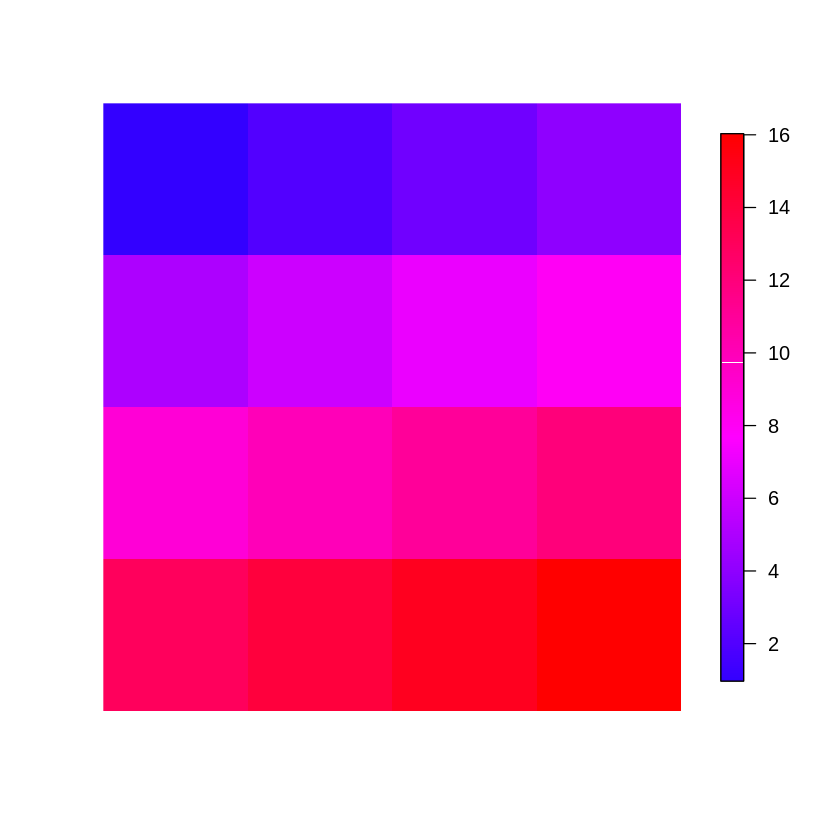

In [9]:
tmp <- rbind(c(1,2,3,4),c(5,6,7,8),c(9,10,11,12),c(13,14,15,16))
tmp
rotate <- function(x) t(apply(x, 2, rev))
image.plot(rotate(tmp),axes=F,col=cols)

52.8,98.0,718.4,3766.2,25001.2
52.4,120.8,1815.8,5002.0,25001.0
82.8,352.2,2502.2,5001.0,25001.2
172.8,500.2,2500.6,5001.2,25004.4
250.8,501.2,2502.8,5000.8,25002.0


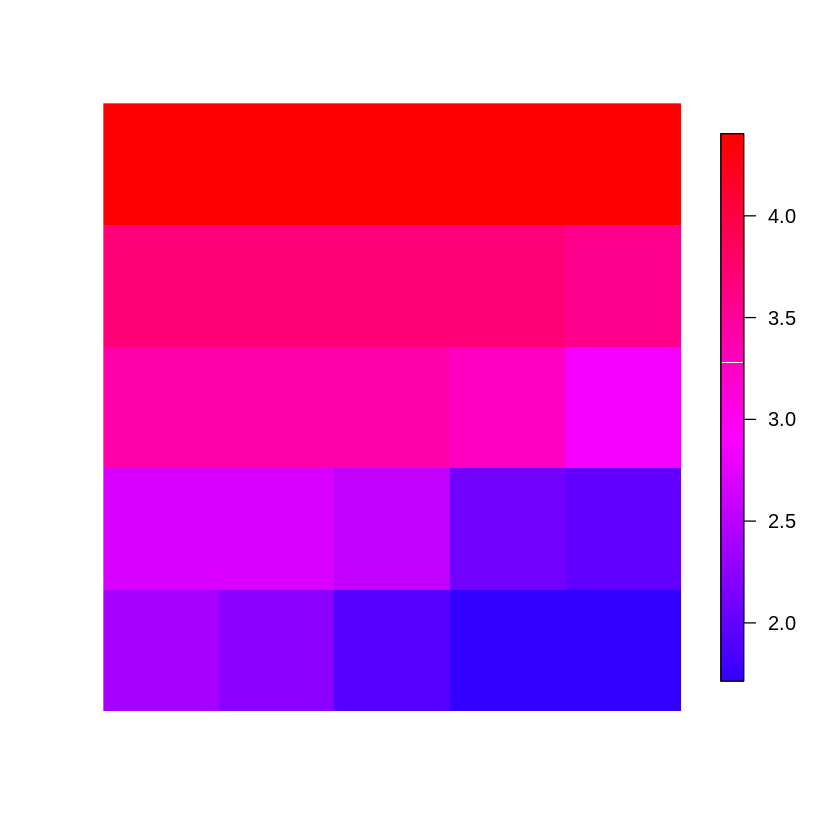

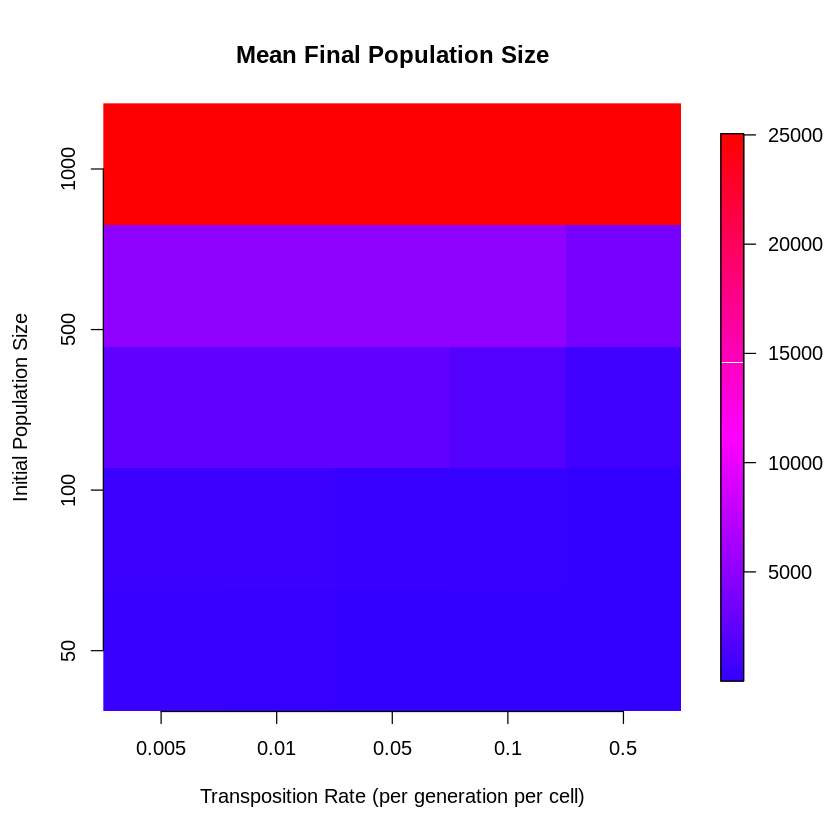

In [15]:
tmp <- res[,3,4,,]
# tmp <- res[,,,3,3]


tmp2 <- array(0,c(5,5))
for (ii in 1:5) {
    for (jj in 1:5){
        tmp2[ii,jj] <- mean(tmp[,ii,jj])
    }
}

tmp2

# pdf('./mean_final_popsize_sp_005_sd_05.pdf')
image.plot(t(rotate(log(tmp2,10))),axes=F,col=cols)
image.plot(t(rotate(tmp2)),axes=F,col=cols)

title(main="Mean Final Population Size",xlab='Transposition Rate (per generation per cell)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.25), labels=c(0.005,0.01,0.05,0.1,0.5)); 
# axis(2, at=seq(0,1,0.25), labels=c(0.005,0.01,0.05,0.1,0.5)); 
# axis(2, at=seq(0,1,0.25), labels=c(5e1,1e2,5e2,1e3,5e3)); 
axis(2, at=seq(0,1,0.33), labels=c(5e1,1e2,5e2,1e3)); 
# dev.off()
